In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
datos = pd.read_csv('baseball_reference_2016_scrape.csv')

In [4]:
# profile = ProfileReport(datos)
# profile

- **away_team:** Cualitativa nominal 
- **away_team_errors:** Cuantitativa discreta 
- **away_team_hits:** Cuantitativa discreta 
- **away_team_runs:** Cuantitativa discreta 
- **boxscore_url:** Cualitativa nominal 
- **date:** Cualitativa ordinal 
- **game_duration:** Cuantitativa continua 
- **game_type:** Cualitativa nominal 
- **home_team:** Cualitativa nominal 
- **home_team_errors:** Cuantitativa discreta 
- **home_team_hits:** Cuantitativa discreta 
- **home_team_runs:** Cuantitativa discreta 
- **other_info_string:** Cualitativa nominal 
- **start_time:** Cualitativa ordinal
- **venue:** Cualitativa nominal 

In [4]:
attendence = []
for row in datos['attendance']:
    num = ""
    for char in row:
        if char.isnumeric():
            num += char
    if num == "":
        num = 0
    attendence.append(int(num))
print(attendence)

[40030, 21621, 12622, 18531, 18572, 28386, 12757, 28329, 26049, 10478, 47820, 24123, 36911, 13468, 45229, 13371, 24318, 40638, 43332, 26271, 40882, 21203, 21226, 34898, 19400, 27938, 16783, 14160, 45432, 41432, 21585, 21078, 16112, 12777, 14706, 37168, 21810, 46268, 16497, 24333, 31453, 12996, 41266, 14832, 30250, 17503, 44954, 21671, 20674, 22735, 18208, 41357, 27217, 42933, 37053, 28755, 23809, 24135, 39077, 24749, 28181, 49271, 40164, 34279, 40087, 42338, 41590, 41028, 47822, 21719, 31559, 35551, 17302, 27567, 40471, 28049, 29862, 15230, 14604, 34579, 22230, 34264, 35291, 46716, 33132, 38712, 17803, 37479, 33148, 30488, 27869, 27257, 28235, 36239, 29396, 20017, 28724, 30304, 20435, 24020, 37354, 40987, 43683, 41280, 26176, 11399, 30861, 38391, 23826, 36162, 14885, 38700, 32480, 13554, 45565, 41363, 36538, 21764, 28213, 28080, 11131, 37422, 21534, 15983, 39512, 20557, 19052, 11345, 34160, 45453, 41448, 30145, 19901, 34971, 18792, 22980, 24678, 24516, 20014, 37696, 41635, 15337, 31625

In [5]:
datos.drop('boxscore_url',axis=1)
datos.drop('field_type',axis=1)
datos.drop('other_info_string',axis=1)
datos['away_team_runs'] = datos['away_team_runs'].replace(0, datos['away_team_runs'].mean())

In [6]:
def convert_duration(duration):
    if isinstance(duration, str) and duration.startswith(':'):
        duration = duration[1:]  # Elimina los dos puntos iniciales
        if duration.strip() == '':  # Maneja el caso de una cadena vacía
            return 0
        else:
            hours, minutes = map(int, duration.split(':'))
            return hours * 60 + minutes
    elif pd.isna(duration):  # Maneja el caso de valores NaN
        return 0
    else:
        return 0
    
datos['game_duration'] = datos['game_duration'].apply(convert_duration)

In [7]:
datos['game_duration_numeric'] = pd.to_numeric(datos['game_duration'], errors='coerce')
datos['game_duration_numeric'] = datos['game_duration_numeric'].replace(0, datos['game_duration_numeric'].mean())

In [8]:
valor_mas_comun = datos['game_type'].mode()[0]
datos['game_type'] = datos['game_type'].fillna(valor_mas_comun)
datos['home_team_runs'] = datos['home_team_runs'].replace(0, datos['home_team_runs'].mean())

In [9]:
datos['attendance'] = attendence
datos['attendance'] = datos['attendance'].replace(0, datos['attendance'].mean())
#separar datos para x y 
x = datos.iloc[:, 1:] 
y = datos.iloc[:, 0] # attendance

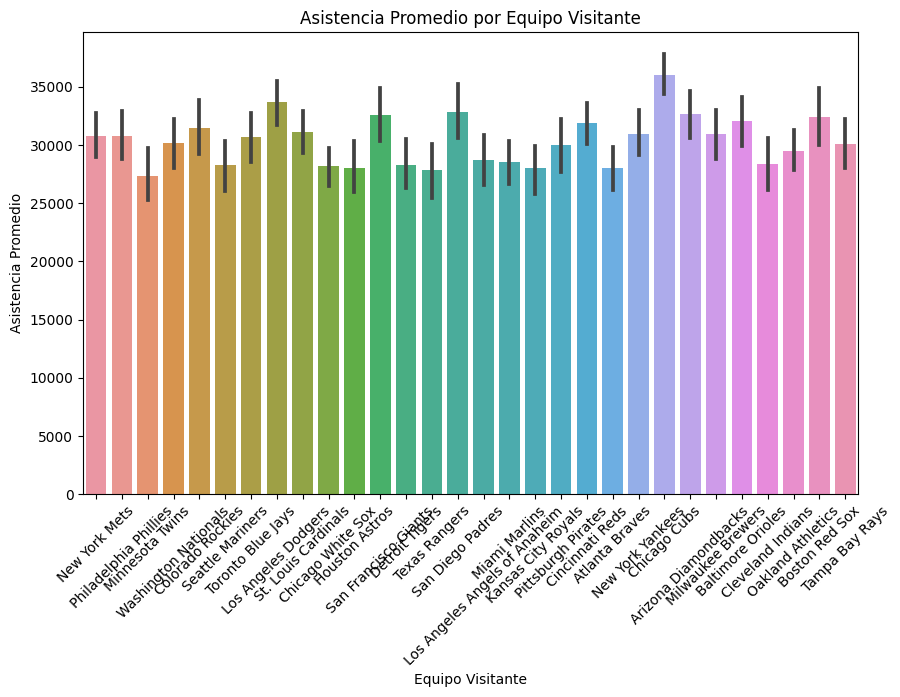

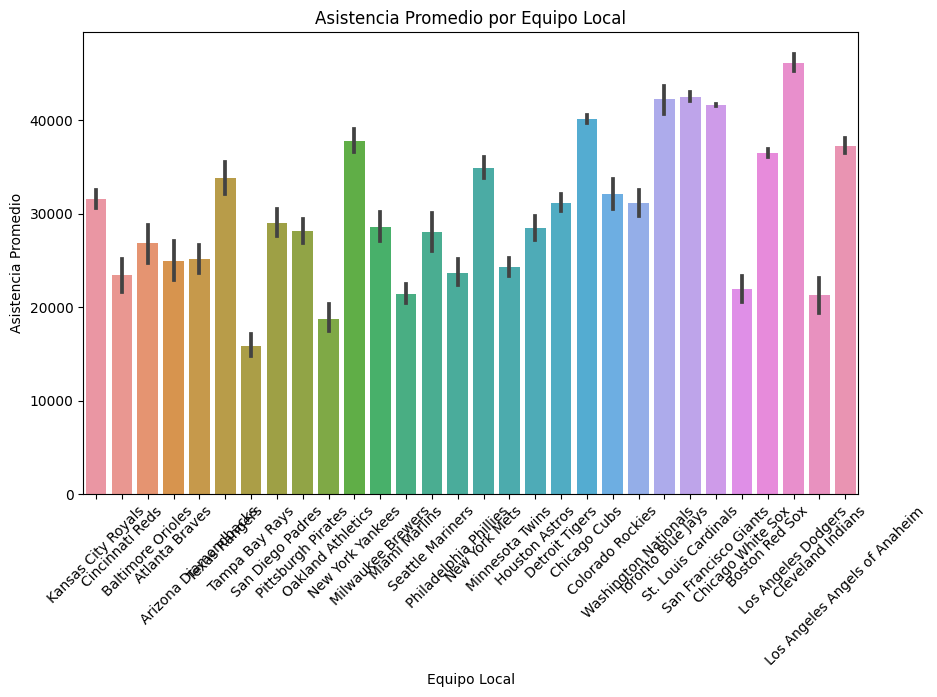

In [10]:
# Gráfico de barras para la variable 'away_team'
plt.figure(figsize=(10, 6))
sns.barplot(x=x['away_team'], y=y)
plt.title('Asistencia Promedio por Equipo Visitante')
plt.xlabel('Equipo Visitante')
plt.ylabel('Asistencia Promedio')
plt.xticks(rotation=45)
plt.show()

# Gráfico de barras para la variable 'home_team'
plt.figure(figsize=(10, 6))
sns.barplot(x=x['home_team'], y=y)
plt.title('Asistencia Promedio por Equipo Local')
plt.xlabel('Equipo Local')
plt.ylabel('Asistencia Promedio')
plt.xticks(rotation=45)
plt.show()

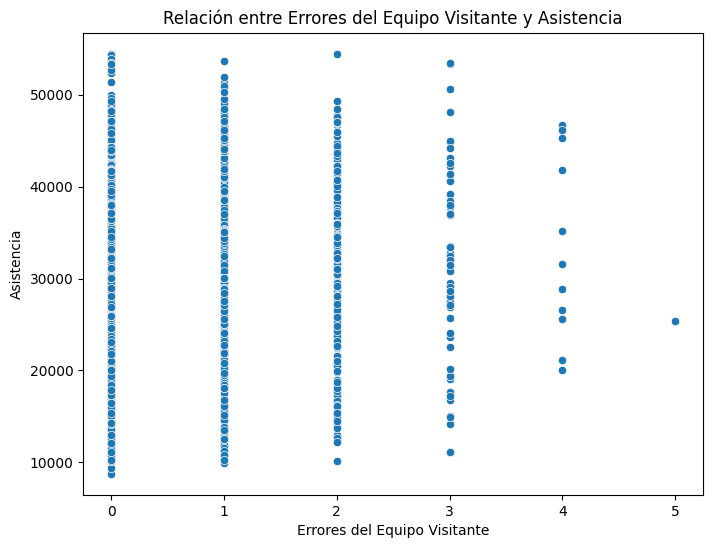

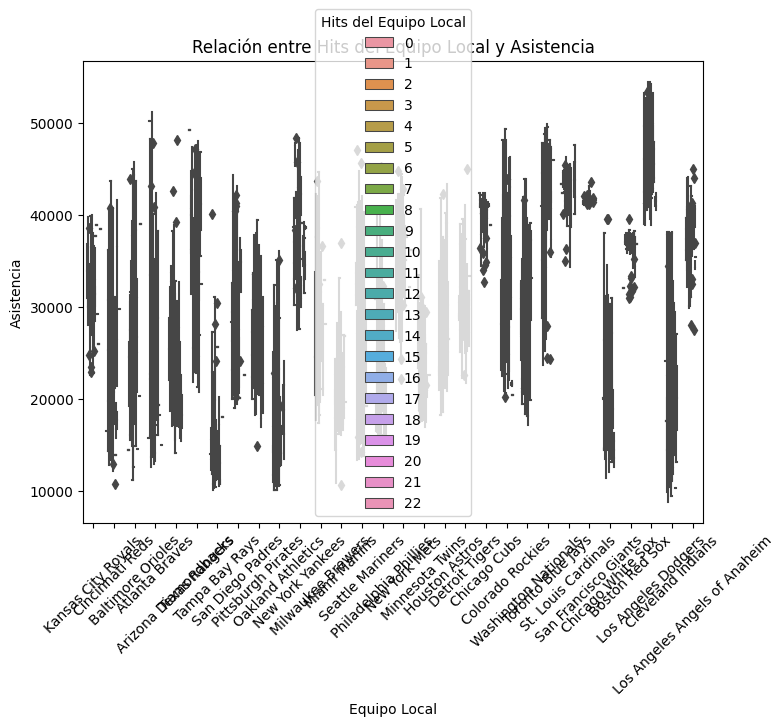

In [12]:
# Diagrama de dispersión para 'away_team_errors' y 'attendance'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x['away_team_errors'], y=y)
plt.title('Relación entre Errores del Equipo Visitante y Asistencia')
plt.xlabel('Errores del Equipo Visitante')
plt.ylabel('Asistencia')
plt.show()

# Diagrama de dispersión para 'home_team_hits' y 'attendance' segmentado por equipo local
plt.figure(figsize=(8, 6))
sns.boxplot(x=x['home_team'], y=y, hue=x['home_team_hits'])
plt.title('Relación entre Hits del Equipo Local y Asistencia')
plt.xlabel('Equipo Local')
plt.ylabel('Asistencia')
plt.xticks(rotation=45)
plt.legend(title='Hits del Equipo Local')
plt.show()


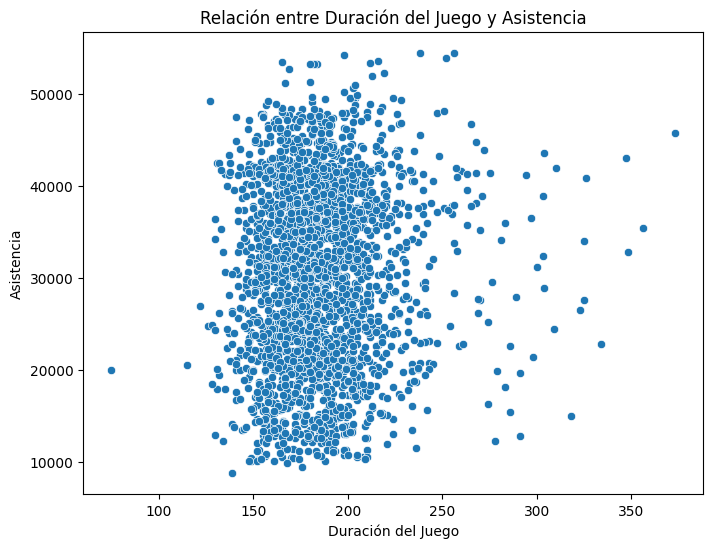

In [14]:
# Diagrama de dispersión para 'game_duration_numeric' y 'attendance'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x['game_duration_numeric'], y=y)
plt.title('Relación entre Duración del Juego y Asistencia')
plt.xlabel('Duración del Juego')
plt.ylabel('Asistencia')
plt.show()


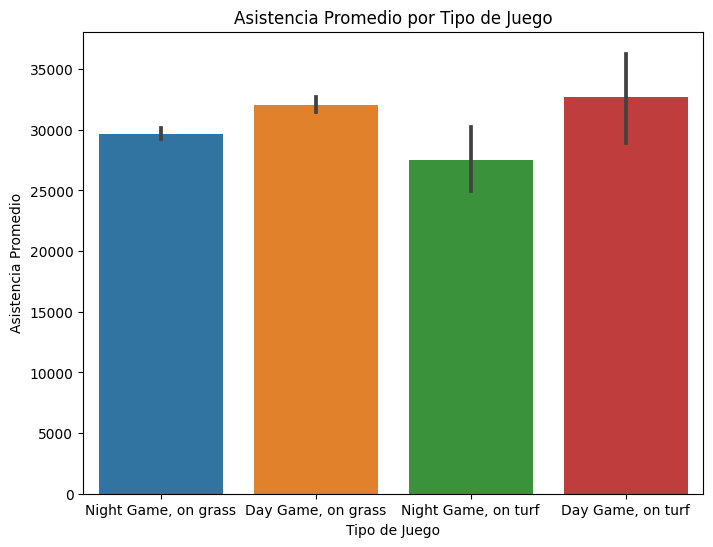

In [15]:
# Gráfico de barras para la variable 'game_type'
plt.figure(figsize=(8, 6))
sns.barplot(x=x['game_type'], y=y)
plt.title('Asistencia Promedio por Tipo de Juego')
plt.xlabel('Tipo de Juego')
plt.ylabel('Asistencia Promedio')
plt.show()


In [11]:
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(x, y, test_size = 0.2, random_state = 1)

### SVR

In [71]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

X = datos.copy()
X = X.drop(columns=['attendance'])
y = datos.copy()
y = y['attendance'].values
X['game_duration'].fillna(X['game_duration'].mean(), inplace=True)

ipt = SimpleImputer(strategy='most_frequent')
y = ipt.fit_transform(y.reshape(-1, 1))

Xs = X.copy()
ys = y.copy()

Xs = Xs.drop(columns=['away_team', 'date', 'start_time', 'venue', 'game_type', 'game_duration', 'boxscore_url', 'field_type',  'other_info_string', 'game_duration_numeric'])

transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
Xs = transformer.fit_transform(Xs)

xScaler = StandardScaler(with_mean=False)
yScaler = StandardScaler()

Xs = xScaler.fit_transform(Xs)
ys = yScaler.fit_transform(ys.reshape(-1, 1))

# SPLIT DE DATOS PARA SVR
X_entreno_svr, X_prueba_svr, y_entreno_svr, y_prueba_svr = train_test_split(Xs, ys, test_size = 0.2, random_state = 1)

regresor = SVR()
regresor.fit(X_entreno_svr, y_entreno_svr)

yPred = regresor.predict(X_prueba_svr)
r2_score(y_prueba_svr, yPred)


c:\Users\brand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5252277278895479

### Predicción

In [78]:


#  equipo X (primer equipo)
equipo_X = [0, 0, 1]

# equipo Y (segundo equipo)
equipo_Y = [0, 1, 0]

dia_semana = [1]
hora = [1.260669]
estadio = [1.993809]

otras_caracteristicas = [0] * 27

input_prediccion = equipo_X + equipo_Y + dia_semana + hora + estadio + otras_caracteristicas

prediccion_asistencia_escalada = regresor.predict([input_prediccion])

# Invierte la escala de la predicción para obtener la asistencia real
prediccion_asistencia = yScaler.inverse_transform(prediccion_asistencia_escalada.reshape(-1, 1))

print("Predicción de asistencia:", prediccion_asistencia)


Predicción de asistencia: [[28904.2463453]]


### Árbol de decisión


In [58]:
from sklearn.tree import DecisionTreeRegressor

X_three = datos.copy()
X_three = X_three.drop(columns=['attendance'])
y_three = datos.copy()
y_three = y_three['attendance'].values
X_three['game_duration'].fillna(X_three['game_duration'].mean(), inplace=True)

X_three = X_three.drop(columns=['away_team', 'date', 'start_time', 'home_team', 'game_type', 'boxscore_url', 'field_type',  'other_info_string', 'game_duration_numeric'])

# X_three.head()
transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [7])], remainder='passthrough')
X_three = transformer.fit_transform(X_three)

X_entreno_three, X_prueba_three, y_entreno_three, y_prueba_three = train_test_split(X_three, y_three, test_size = 0.2, random_state = 1)
regresor_three = DecisionTreeRegressor(criterion='squared_error')
regresor_three.fit(X_entreno_three, y_entreno_three)

y_pred_three = regresor_three.predict(X_prueba_three)
r2_score(y_prueba_three, y_pred_three)


0.028588622455274826

### Random Forest


In [70]:
from sklearn.ensemble import RandomForestRegressor

X_random = datos.copy()
X_random = X_random.drop(columns=['attendance'])
y_random = datos.copy()
y_random = y_random['attendance'].values
# X_random['game_duration'].fillna(X_random['game_duration'].mean(), inplace=True)

X_random = X_random.drop(columns=['away_team', 'date', 'start_time', 'home_team', 'game_type', 'boxscore_url','venue', 'field_type',  'other_info_string', 'game_duration_numeric'])

transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X_random = transformer.fit_transform(X_random)

X_entreno_random, X_prueba_random, y_entreno_random, y_prueba_random = train_test_split(X_random, y_random, test_size = 0.2, random_state = 0)
regresor_random = RandomForestRegressor(n_estimators = 20, random_state = 0)
regresor_random.fit(X_entreno_random, y_entreno_random)

y_pred_random = regresor_random.predict(X_prueba_random)
r2_score(y_prueba_random, y_pred_random)


-0.10338538900426997

# Conclusiones
En general, el rendimiento para los datos proporcionados no fueron realmente relevantes. Teniendo 0.5 como el rendimiento más alto, perteneciendo al SVR. Esto puede deberse principalmente a los datos, ya que existían diversas columnas que no nos daban información directa o relevante sobre la predicción de la asistencia de los aficionados. Además, se realizó la predicción para el modelo SVR, en donde el modelo predice que aproximadamente 28,904 personas asistirán al partido bajo las condiciones especificadas.